In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

In [2]:
inf_pedge = sorted(glob('/n/holylfs05/LABS/jacob_lab/jeast/proj/seasonality/post/tropomi_gridded/S1-1-ptest/*.nc'))
inf_smet = sorted(glob('/n/holylfs05/LABS/jacob_lab/jeast/proj/seasonality/post/tropomi_gridded/S1-1-ptest-psurf/*.nc'))

In [3]:
ds_pedge = xr.open_mfdataset(inf_pedge,combine='nested',concat_dim='time')
ds_smet = xr.open_mfdataset(inf_smet,combine='nested',concat_dim='time')

In [4]:
ds_pedge.load();
ds_smet.load();

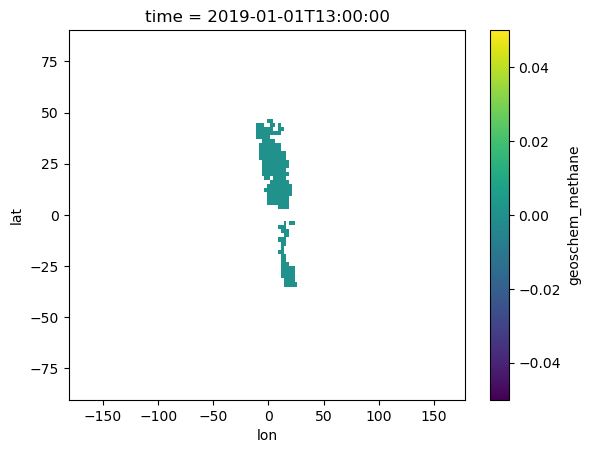

In [5]:
(ds_smet.geoschem_methane.isel(time=13) - ds_pedge.geoschem_methane.isel(time=13)).plot()

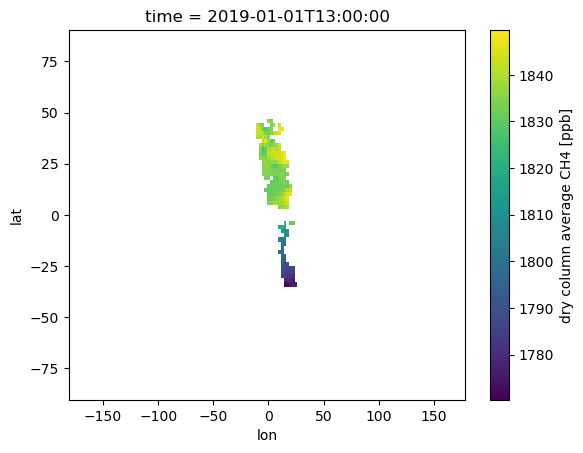

In [6]:
ds_smet.geoschem_methane.isel(time=13).plot()

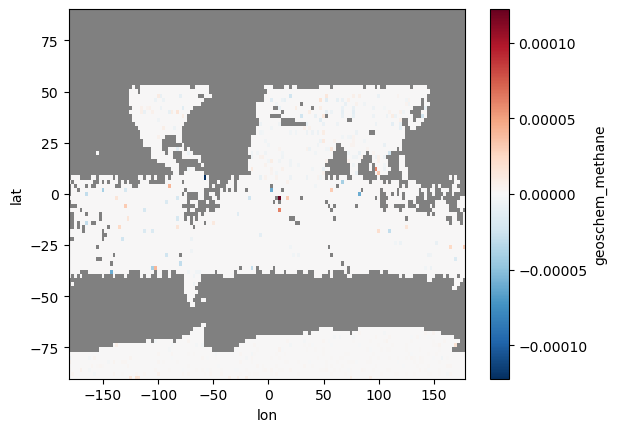

In [37]:
(ds_smet.geoschem_methane - ds_pedge.geoschem_methane).mean('time').plot()
plt.gca().set_facecolor('grey')

In [7]:
ppath = '/n/holyscratch01/jacob_lab/jeast/proj/seasonality/runs/S1-1-ptest/OutputDir/GEOSChem.LevelEdgeDiags.20190101_0000z.nc4'
mpath = ppath.replace('LevelEdgeDiags','StateMet')
cpath = ppath.replace('LevelEdgeDiags','SpeciesConc')

In [8]:
pf = xr.open_dataset(ppath)
mf = xr.open_dataset(mpath)
cf = xr.open_dataset(cpath)
pf.load();
mf.load();
cf.load();

In [9]:
mf.Met_PSC2WET.dims

('time', 'lat', 'lon')

In [10]:
pedge_smet = (cf.hyai.values[None,:,None,None] + (cf.hybi.values[None,:,None,None] * mf.Met_PSC2WET.values[:,None,:,:]))

In [11]:
pedge_smet.shape

(24, 73, 91, 144)

In [12]:
pedge_diag = pf.Met_PEDGE

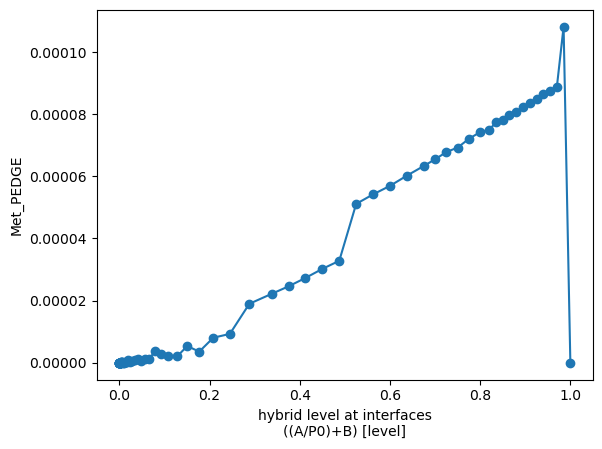

In [13]:
np.abs((pedge_diag - pedge_smet)).max(('time','lat','lon')).plot(marker='o')

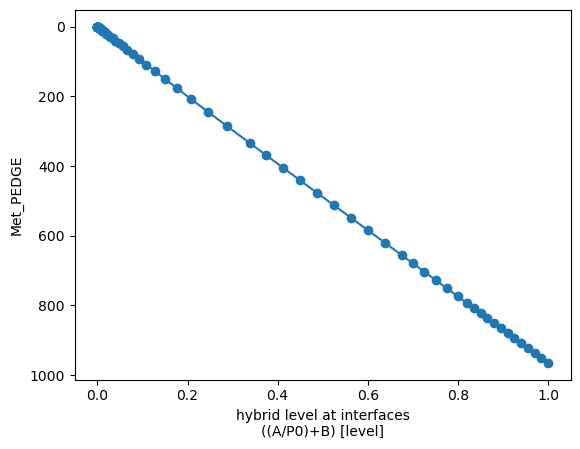

In [14]:
pedge_diag.mean(('time','lat','lon')).plot(marker='o')
plt.gca().invert_yaxis()

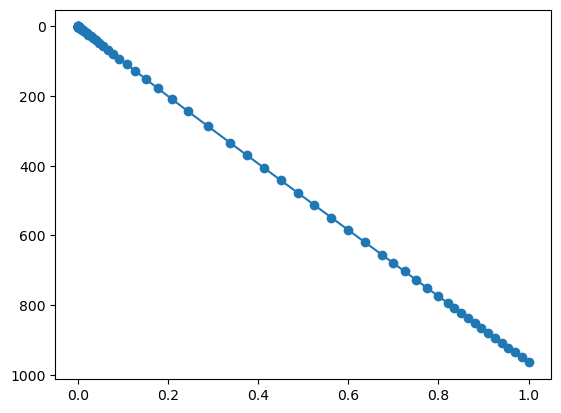

In [15]:
plt.plot(
    cf.hyai.values/cf.P0.values + cf.hybi,
    pedge_smet.mean((0,2,3)),
    marker='o'
)
plt.gca().invert_yaxis()